Set Up

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Consumer Discretionary Industry Analysis

In [2]:
cdstockdf = pd.DataFrame()
symbols = []
import os

for dname, _, fname in os.walk('/Users/larryguo/Downloads/172FinalProjData/consumer_discretionary_stocks'):
    for i in range(0,755):
        symbol = fname[i].split('.')[0]
        symbols.append(symbol)
        newdf = pd.read_csv(os.path.join(dname, fname[i]))
        newdf['Symbol'] = symbol
        cdstockdf = pd.concat([cdstockdf,newdf], ignore_index = True)

In [3]:
cdstockdf['Date'] = pd.to_datetime(cdstockdf['Date'])
cdstockdf_copy = cdstockdf.loc[cdstockdf.Date > '2020-01-01'].copy()

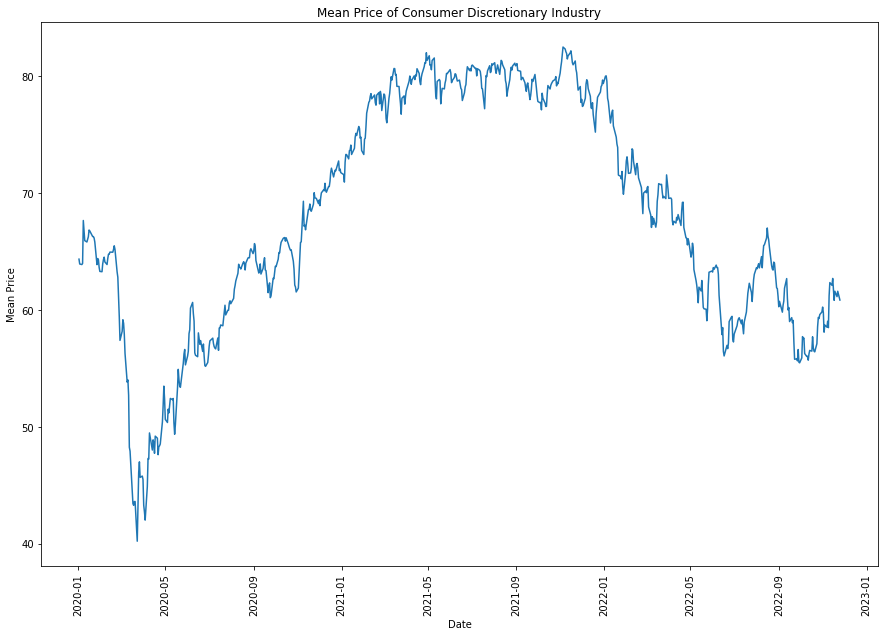

In [4]:
plt.figure(figsize=(15,10))
meandf = cdstockdf_copy.groupby(['Date']).mean()
plt.title('Mean Price of Consumer Discretionary Industry')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation = 'vertical')
plt.plot(meandf.index,meandf['High'])


Prices of all stocks in the Finanicals Industry since COVID

In [5]:
cdclosemean = cdstockdf_copy.groupby('Date').Close.mean()
cdclosemean

Date
2020-01-02    63.571773
2020-01-03    63.382960
2020-01-06    63.398640
2020-01-07    63.358710
2020-01-08    65.566407
                ...    
2022-11-18    60.615444
2022-11-21    60.258574
2022-11-22    61.194179
2022-11-23    60.737471
2022-11-25    60.334828
Name: Close, Length: 732, dtype: float64

In [6]:
cdstockdf_copy.groupby('Symbol').Close.max()

Symbol
AAL      30.469999
AAP     241.910004
AAWW    101.139999
ABG     229.649994
ABM      53.540001
           ...    
YUM     138.860001
YUMC     69.400002
Z       199.899994
ZD      132.979996
ZG      203.789993
Name: Close, Length: 755, dtype: float64

In [69]:
cdstockdf_copy['Returns'] = cdstockdf_copy.groupby('Symbol')['Close'].pct_change()
cdstockdf_copy

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Returns,Sector
0,2020-01-02,33.470001,33.639999,31.540001,32.040001,29.216829,1648900,SBGI,NaN,Consumer Discretionary
1,2020-01-03,31.690001,32.200001,30.780001,32.000000,29.180353,1426700,SBGI,-0.001248,Consumer Discretionary
2,2020-01-06,32.040001,32.480000,31.230000,31.760000,28.961500,909600,SBGI,-0.007500,Consumer Discretionary
3,2020-01-07,31.590000,32.639999,31.549999,31.620001,28.833838,953600,SBGI,-0.004408,Consumer Discretionary
4,2020-01-08,31.590000,32.090000,31.200001,31.879999,29.070925,1887100,SBGI,0.008223,Consumer Discretionary
...,...,...,...,...,...,...,...,...,...,...
500661,2022-11-18,6.850000,7.280000,6.850000,7.280000,7.280000,700,FATBB,-0.008309,Consumer Discretionary
500662,2022-11-21,6.850000,7.032000,6.570000,6.868000,6.868000,1400,FATBB,-0.056593,Consumer Discretionary
500663,2022-11-22,6.830000,7.460000,6.830000,7.000000,7.000000,14400,FATBB,0.019220,Consumer Discretionary
500664,2022-11-23,7.150000,7.150000,6.850000,6.850000,6.850000,2500,FATBB,-0.021429,Consumer Discretionary


In [8]:
worst_returns_list = cdstockdf_copy.groupby('Symbol').Returns.min().to_list()
cdstockdf_copy[cdstockdf_copy.Returns.isin(worst_returns_list)].groupby('Symbol').Date.min()

Symbol
AAL    2020-01-02
AAP    2020-01-02
AAWW   2020-01-02
ABG    2020-01-02
ABM    2020-01-02
          ...    
YUM    2020-01-02
YUMC   2020-01-02
Z      2020-01-02
ZD     2020-01-02
ZG     2020-01-02
Name: Date, Length: 755, dtype: datetime64[ns]

In [9]:
best_returns_list = cdstockdf_copy.groupby('Symbol').Returns.max().to_list()
cdstockdf_copy[cdstockdf_copy.Returns.isin(best_returns_list)].groupby('Symbol').Date.max()

Symbol
AAL    2020-06-04
AAP    2020-04-06
AAWW   2020-03-17
ABG    2020-03-24
ABM    2020-06-18
          ...    
YUM    2020-03-24
YUMC   2022-03-16
Z      2020-04-06
ZD     2020-08-11
ZG     2020-04-06
Name: Date, Length: 755, dtype: datetime64[ns]

In [10]:
cdstockdf_copy["Sector"]='Consumer Discretionary'

In [68]:
cdstockdf_copy.drop(cdstockdf_copy[cdstockdf_copy.Symbol == 'MOBQ'].index, inplace = True)

Finanicals Industry Analysis

In [11]:
fistockdf = pd.DataFrame()
symbols = []
import os

for dname, _, fname in os.walk('/Users/larryguo/Downloads/172FinalProjData/financials_stocks'):
    for i in range(0,1392):
        symbol = fname[i].split('.')[0]
        symbols.append(symbol)
        newdf = pd.read_csv(os.path.join(dname, fname[i]))
        newdf['Symbol'] = symbol
        fistockdf = pd.concat([fistockdf,newdf], ignore_index = True)

In [12]:
fistockdf['Date'] = pd.to_datetime(fistockdf['Date'])
fistockdf_copy = fistockdf.loc[fistockdf.Date > '2020-01-01'].copy()

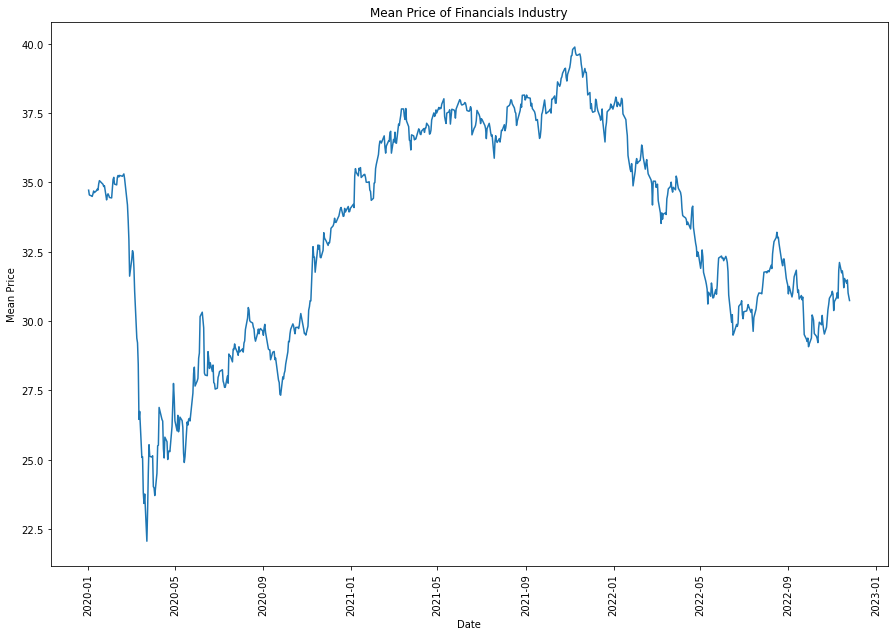

In [13]:
plt.figure(figsize=(15,10))
meandf = fistockdf_copy.groupby(['Date']).mean()
plt.title('Mean Price of Financials Industry')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation = 'vertical')
plt.plot(meandf.index,meandf['High'])


In [14]:
ficlosemean = fistockdf_copy.groupby('Date').Close.mean()
ficlosemean

Date
2020-01-02    34.514563
2020-01-03    34.367465
2020-01-06    34.338070
2020-01-07    34.210768
2020-01-08    34.342509
                ...    
2022-11-18    31.131354
2022-11-21    31.133373
2022-11-22    31.283353
2022-11-23    30.775724
2022-11-25    30.583575
Name: Close, Length: 732, dtype: float64

In [15]:
fistockdf_copy["Sector"]='Financials'

In [64]:
fistockdf_copy['Returns'] = fistockdf_copy.groupby('Symbol')['Close'].pct_change()
fistockdf_copy

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Sector,Returns
0,2020-01-02,130.889999,131.860001,130.399994,131.830002,126.470192,140500,PRI,Financials,NaN
1,2020-01-03,129.949997,132.139999,129.330002,131.710007,126.355095,182200,PRI,Financials,-0.000910
2,2020-01-06,130.330002,130.889999,129.580002,130.580002,125.271034,225800,PRI,Financials,-0.008579
3,2020-01-07,129.979996,131.229996,129.669998,130.490005,125.184708,96800,PRI,Financials,-0.000689
4,2020-01-08,130.479996,131.570007,129.539993,129.699997,124.426811,133400,PRI,Financials,-0.006054
...,...,...,...,...,...,...,...,...,...,...
825909,2022-11-18,10.050000,10.100000,10.050000,10.060000,10.060000,8000,IVCP,Financials,0.000995
825910,2022-11-21,10.060000,10.060000,10.060000,10.060000,10.060000,0,IVCP,Financials,0.000000
825911,2022-11-22,10.075000,10.075000,10.075000,10.075000,10.075000,100,IVCP,Financials,0.001491
825912,2022-11-23,10.075000,10.075000,10.075000,10.075000,10.075000,0,IVCP,Financials,0.000000


In [63]:
#fistockdf_copy.drop(, axis=0,inplace = True)
#fistockdf.drop(292716, axis=0,inplace = True)
#fistockdf_copy.drop(fistockdf_copy[fistockdf_copy.Symbol == 'FICV'].index, inplace = True)
fistockdf_copy.drop(fistockdf_copy[fistockdf_copy.Symbol == 'NCPL'].index, inplace = True)

Technology Industry Analysis

In [18]:
techstockdf = pd.DataFrame()
symbols = []
import os

for dname, _, fname in os.walk('/Users/larryguo/Downloads/172FinalProjData/technology_stocks'):
    for i in range(0,609):
        symbol = fname[i].split('.')[0]
        symbols.append(symbol)
        newdf = pd.read_csv(os.path.join(dname, fname[i]))
        newdf['Symbol'] = symbol
        techstockdf = pd.concat([techstockdf,newdf], ignore_index = True)

In [19]:
techstockdf['Date'] = pd.to_datetime(techstockdf['Date'])
techstockdf_copy = techstockdf.loc[techstockdf.Date > '2020-01-01'].copy()

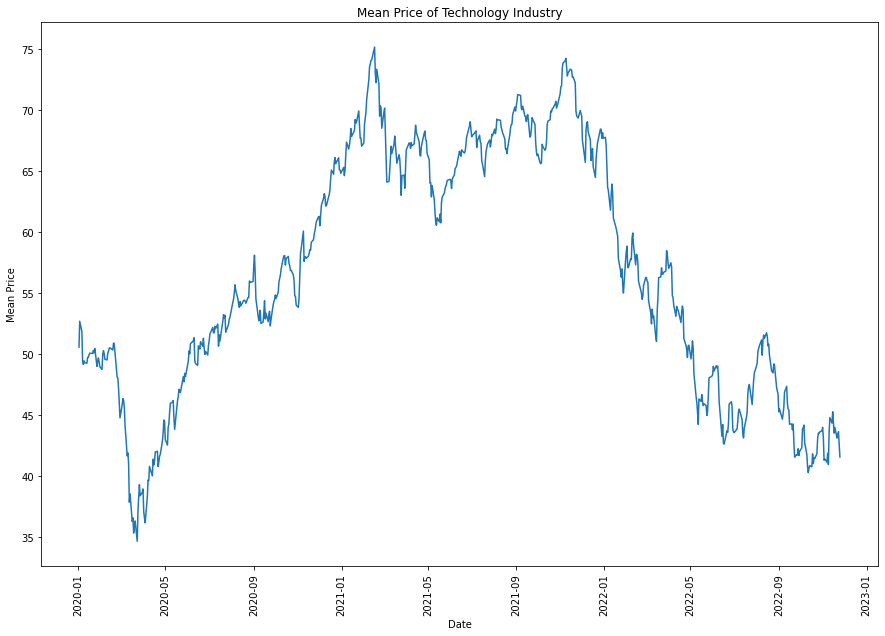

In [20]:
plt.figure(figsize=(15,10))
meandf = techstockdf_copy.groupby(['Date']).mean()
plt.title('Mean Price of Technology Industry')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation = 'vertical')
plt.plot(meandf.index,meandf['High'])

In [21]:
techclosemean = techstockdf_copy.groupby('Date').Close.mean()
techclosemean

Date
2020-01-02    49.790957
2020-01-03    50.677050
2020-01-06    48.706234
2020-01-07    48.434764
2020-01-08    48.492252
                ...    
2022-11-18    42.967500
2022-11-21    42.368440
2022-11-22    43.054282
2022-11-23    43.112670
2022-11-25    41.187994
Name: Close, Length: 732, dtype: float64

In [22]:
techstockdf_copy["Sector"]='Technology'

In [48]:
techstockdf_copy['Returns'] = techstockdf_copy.groupby('Symbol')['Close'].pct_change()

Health Care Industry Analysis

In [23]:
hcstockdf = pd.DataFrame()
symbols = []
import os

for dname, _, fname in os.walk('/Users/larryguo/Downloads/172FinalProjData/healthcare_stocks'):
    for i in range(0,1028):
        symbol = fname[i].split('.')[0]
        symbols.append(symbol)
        newdf = pd.read_csv(os.path.join(dname, fname[i]))
        newdf['Symbol'] = symbol
        hcstockdf = pd.concat([hcstockdf,newdf], ignore_index = True)

In [24]:
hcstockdf['Date'] = pd.to_datetime(hcstockdf['Date'])
hcstockdf_copy = hcstockdf.loc[hcstockdf.Date > '2020-01-01'].copy()

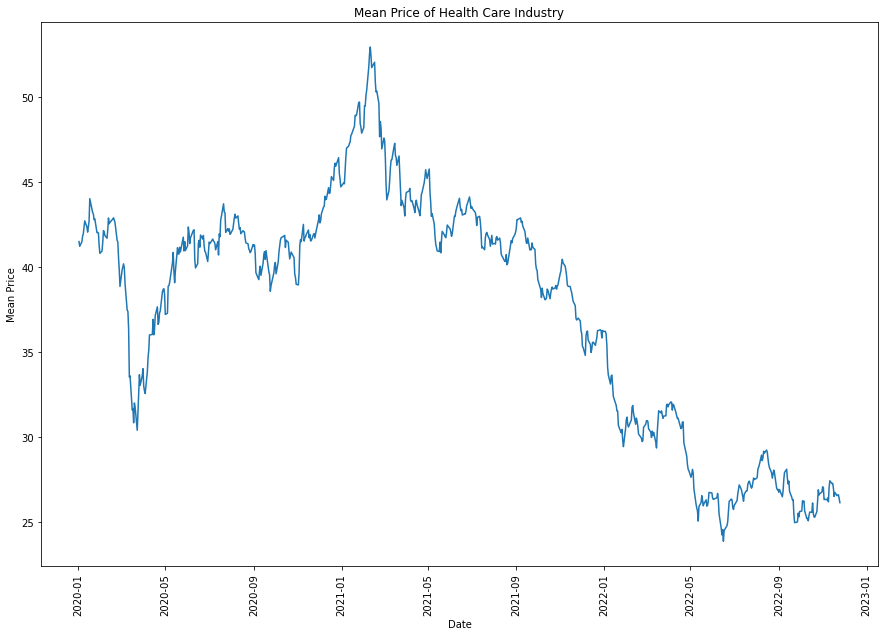

In [25]:
plt.figure(figsize=(15,10))
meandf = hcstockdf_copy.groupby(['Date']).mean()
plt.title('Mean Price of Health Care Industry')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation = 'vertical')
plt.plot(meandf.index,meandf['High'])

In [26]:
hcclosemean = hcstockdf_copy.groupby('Date').Close.mean()
hcclosemean

Date
2020-01-02    40.507779
2020-01-03    40.351810
2020-01-06    40.694211
2020-01-07    40.708013
2020-01-08    40.997427
                ...    
2022-11-18    26.280570
2022-11-21    26.063911
2022-11-22    26.361111
2022-11-23    26.249935
2022-11-25    25.929554
Name: Close, Length: 732, dtype: float64

In [27]:
hcstockdf_copy["Sector"]='Health Care'

In [49]:
hcstockdf_copy['Returns'] = hcstockdf_copy.groupby('Symbol')['Close'].pct_change()

Energy Industry Analysis

In [28]:
enstockdf = pd.DataFrame()
symbols = []
import os

for dname, _, fname in os.walk('/Users/larryguo/Downloads/172FinalProjData/energy_stocks'):
    for i in range(0,150):
        symbol = fname[i].split('.')[0]
        symbols.append(symbol)
        newdf = pd.read_csv(os.path.join(dname, fname[i]))
        newdf['Symbol'] = symbol
        enstockdf = pd.concat([enstockdf,newdf], ignore_index = True)

In [29]:
enstockdf['Date'] = pd.to_datetime(enstockdf['Date'])
enstockdf_copy = enstockdf.loc[enstockdf.Date > '2020-01-01'].copy()

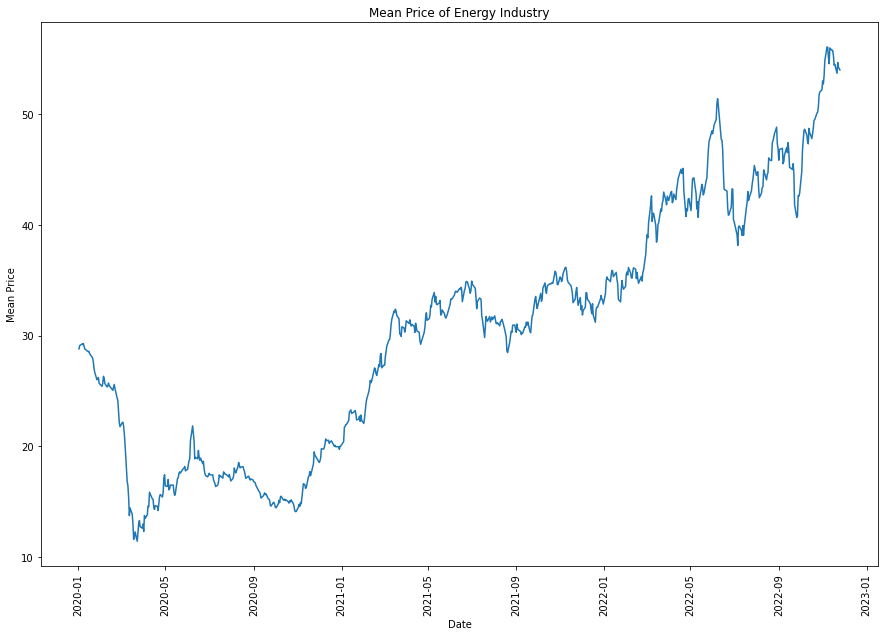

In [30]:
plt.figure(figsize=(15,10))
meandf = enstockdf_copy.groupby(['Date']).mean()
plt.title('Mean Price of Energy Industry')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation = 'vertical')
plt.plot(meandf.index,meandf['High'])

In [31]:
enclosemean = enstockdf_copy.groupby('Date').Close.mean()
enclosemean

Date
2020-01-02    28.353384
2020-01-03    28.601471
2020-01-06    28.909754
2020-01-07    28.950688
2020-01-08    28.566500
                ...    
2022-11-18    54.132335
2022-11-21    52.412996
2022-11-22    54.181020
2022-11-23    53.115409
2022-11-25    52.954772
Name: Close, Length: 732, dtype: float64

In [32]:
enstockdf_copy["Sector"]='Energy'

In [74]:
enstockdf_copy['Returns'] = enstockdf_copy.groupby('Symbol')['Close'].pct_change()

In [73]:
enstockdf_copy.drop(enstockdf_copy[enstockdf_copy.Symbol == 'CHRD'].index, inplace = True)

Telecommunications Industry Analysis

In [33]:
tcstockdf = pd.DataFrame()
symbols = []
import os

for dname, _, fname in os.walk('/Users/larryguo/Downloads/172FinalProjData/telecommunications_stocks'):
    for i in range(0,40):
        symbol = fname[i].split('.')[0]
        symbols.append(symbol)
        newdf = pd.read_csv(os.path.join(dname, fname[i]))
        newdf['Symbol'] = symbol
        tcstockdf = pd.concat([tcstockdf,newdf], ignore_index = True)

In [34]:
tcstockdf['Date'] = pd.to_datetime(tcstockdf['Date'])
tcstockdf_copy = tcstockdf.loc[tcstockdf.Date > '2020-01-01'].copy()

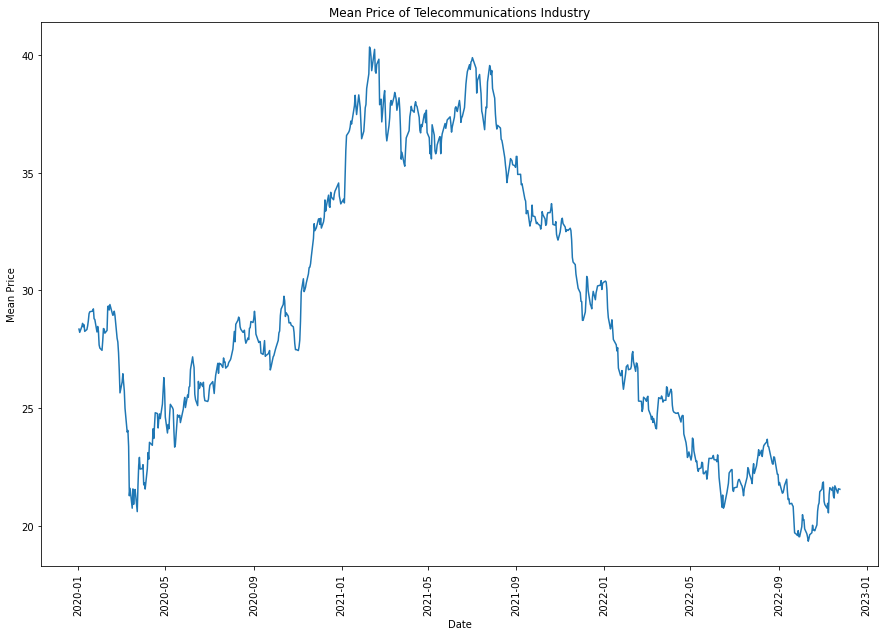

In [35]:
plt.figure(figsize=(15,10))
meandf = tcstockdf_copy.groupby(['Date']).mean()
plt.title('Mean Price of Telecommunications Industry')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation = 'vertical')
plt.plot(meandf.index,meandf['High'])

In [36]:
tcclosemean = tcstockdf_copy.groupby('Date').Close.mean()
tcclosemean

Date
2020-01-02    28.149690
2020-01-03    27.926589
2020-01-06    28.288943
2020-01-07    28.137173
2020-01-08    28.133491
                ...    
2022-11-18    21.224100
2022-11-21    21.094350
2022-11-22    21.259125
2022-11-23    21.298075
2022-11-25    21.363500
Name: Close, Length: 732, dtype: float64

In [37]:
tcstockdf_copy["Sector"]='Telecommunications'

In [51]:
tcstockdf_copy['Returns'] = tcstockdf_copy.groupby('Symbol')['Close'].pct_change()

Overall Trend

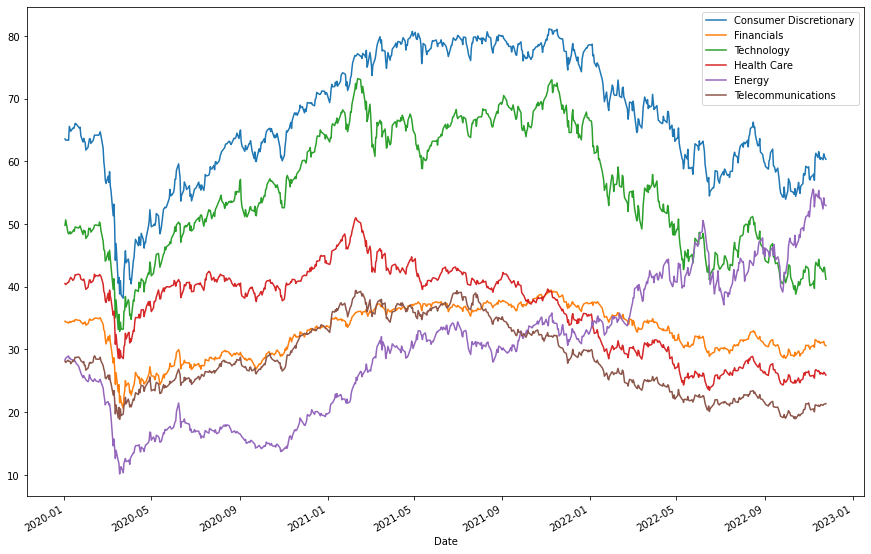

In [38]:
plt.figure(figsize=(15,10))
cdclosemean.plot()
ficlosemean.plot()
techclosemean.plot()
hcclosemean.plot()
enclosemean.plot()
tcclosemean.plot()
plt.legend(['Consumer Discretionary', 'Financials', 'Technology', 'Health Care','Energy','Telecommunications'])

In [104]:

all_sectors = pd.concat([enstockdf_copy,cdstockdf_copy, fistockdf_copy, techstockdf_copy, hcstockdf_copy, tcstockdf_copy],axis=0)

all_sectors.drop(all_sectors[(all_sectors.Returns > 0.2)|(all_sectors.Returns < -0.2)].index, inplace = True)
all_sectors


,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Sector,Returns
0,2020-01-02,18.260000,18.320000,17.780001,17.969999,11.713212,283100,USAC,Energy,NaN
1,2020-01-03,18.090000,18.200001,17.770000,17.959999,11.706694,216800,USAC,Energy,-0.000556
2,2020-01-06,18.090000,18.139999,17.900000,18.090000,11.791432,271700,USAC,Energy,0.007238
3,2020-01-07,17.740000,18.010000,17.700001,17.959999,11.706694,316400,USAC,Energy,-0.007186
4,2020-01-08,17.840000,18.030001,17.570000,17.730000,11.556777,220000,USAC,Energy,-0.012806
...,...,...,...,...,...,...,...,...,...,...
26852,2022-11-18,57.759998,57.792999,54.919998,55.650002,55.650002,3955700,ROKU,Telecommunications,-0.013473
26853,2022-11-21,55.080002,55.285000,52.689999,53.660000,53.660000,4533300,ROKU,Telecommunications,-0.035759
26854,2022-11-22,53.270000,54.470001,52.425999,54.360001,54.360001,3575200,ROKU,Telecommunications,0.013045
26855,2022-11-23,54.849998,57.040001,54.310001,56.509998,56.509998,4273500,ROKU,Telecommunications,0.039551


In [117]:
six_sectors = pd.concat([enstockdf,cdstockdf, fistockdf, techstockdf, hcstockdf, tcstockdf],axis=0)

six_sectors


,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2020-01-02,18.260000,18.320000,17.780001,17.969999,11.713212,283100,USAC
1,2020-01-03,18.090000,18.200001,17.770000,17.959999,11.706694,216800,USAC
2,2020-01-06,18.090000,18.139999,17.900000,18.090000,11.791432,271700,USAC
3,2020-01-07,17.740000,18.010000,17.700001,17.959999,11.706694,316400,USAC
4,2020-01-08,17.840000,18.030001,17.570000,17.730000,11.556777,220000,USAC
...,...,...,...,...,...,...,...,...
26852,2022-11-18,57.759998,57.792999,54.919998,55.650002,55.650002,3955700,ROKU
26853,2022-11-21,55.080002,55.285000,52.689999,53.660000,53.660000,4533300,ROKU
26854,2022-11-22,53.270000,54.470001,52.425999,54.360001,54.360001,3575200,ROKU
26855,2022-11-23,54.849998,57.040001,54.310001,56.509998,56.509998,4273500,ROKU


In [40]:
#all_sectors['Date'] = pd.to_datetime(all_sectors['Date'])
#all_sectors = all_sectors.loc[all_sectors.Date > '2020-01-01'].copy()

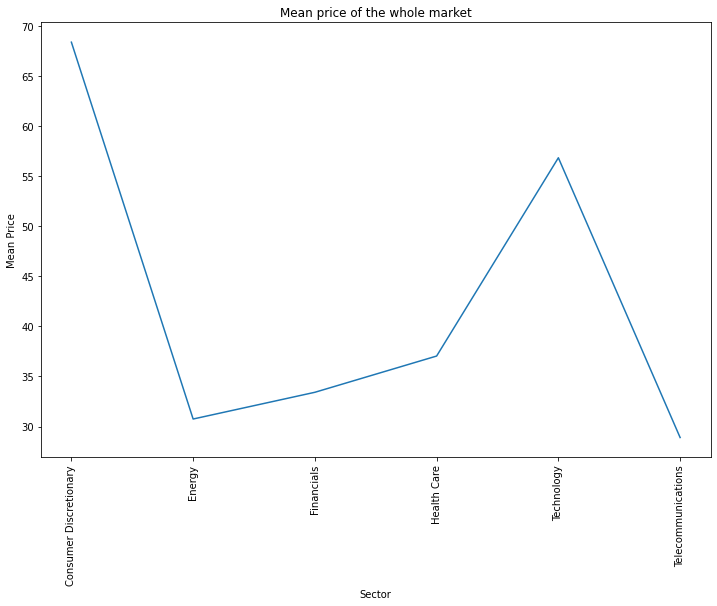

In [116]:
plt.figure(figsize=(12,8))
meandf = all_sectors.groupby(['Sector']).mean()
plt.title('Mean price of the whole market')
plt.xlabel('Sector')
plt.ylabel('Mean Price')
plt.xticks(rotation = 'vertical')
plt.plot(meandf.index,meandf['High'])

[Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]
[0.  0.2 0.4 0.6 0.8 1. ]


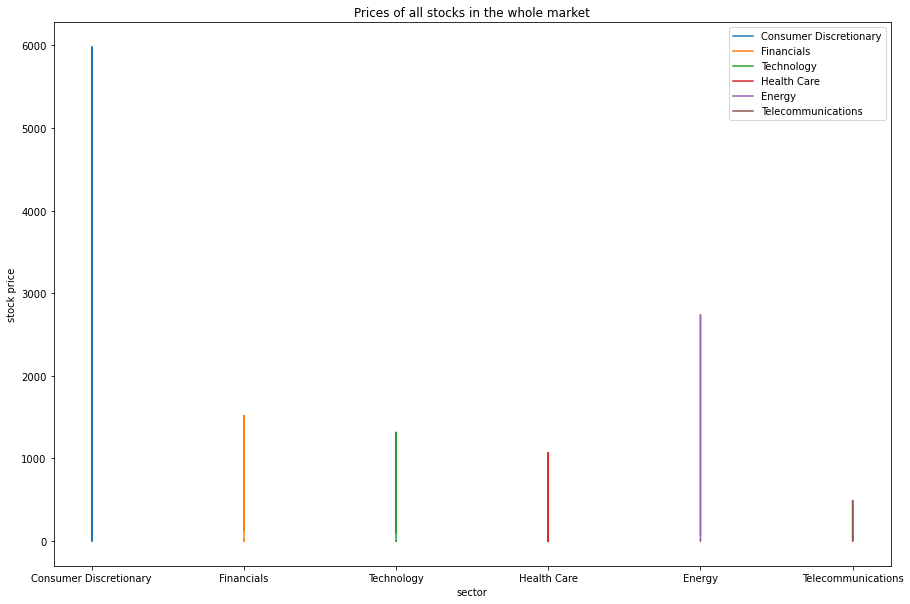

In [113]:
plt.figure(figsize=(15,10))
plt.title('Prices of all stocks in the whole market')
plt.ylabel('stock price')
plt.xlabel('sector')

locs, labels = plt.xticks()
print(labels)
print(locs)
sectors = ['Consumer Discretionary', 'Financials', 'Technology', 'Health Care','Energy','Telecommunications']
for sector in sectors:
    sectordf = all_sectors.loc[all_sectors['Sector'] == sector]
    plt.plot(sectordf.Sector,sectordf.High, label=sector)
    plt.legend()

            Date  Open   High   Low  Close  Adj Close     Volume Symbol  \
65942 2022-03-07  3.28  13.94  2.96   11.3       11.3  199764200   HUSA   

       Sector   Returns  
65942  Energy  4.947369  


<AxesSubplot:title={'center':'Returns'}, xlabel='Sector'>

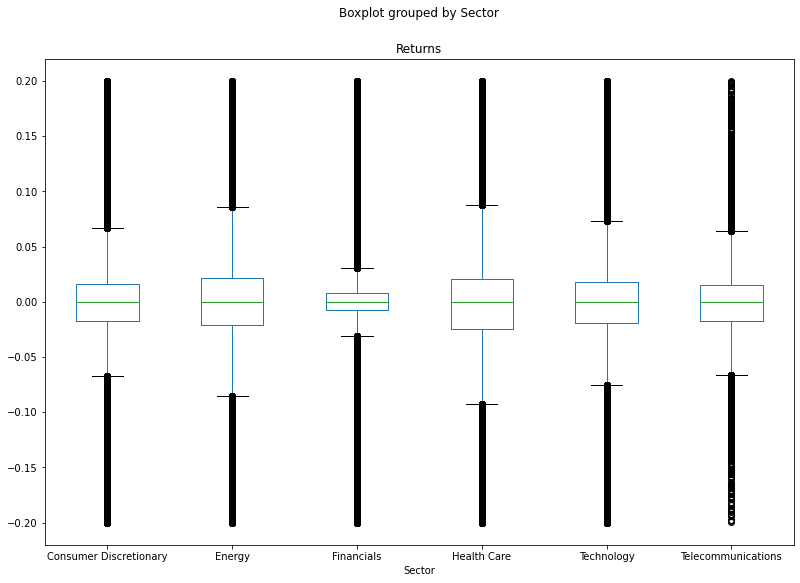

In [107]:
#fistockdf.drop(237485, axis=0)

print(enstockdf_copy[enstockdf_copy['Returns'] == enstockdf_copy.Returns.max()])
#print(all_sectors)
#print(all_sectors.index==238217)

#all_sectors['Returns'] = all_sectors.groupby('Symbol')['Close'].pct_change()
#print(all_sectors.groupby('Sector').Returns.max())
all_sectors.boxplot(column='Returns', by='Sector', grid=False, figsize = (13,9))


<AxesSubplot:xlabel='Sector'>

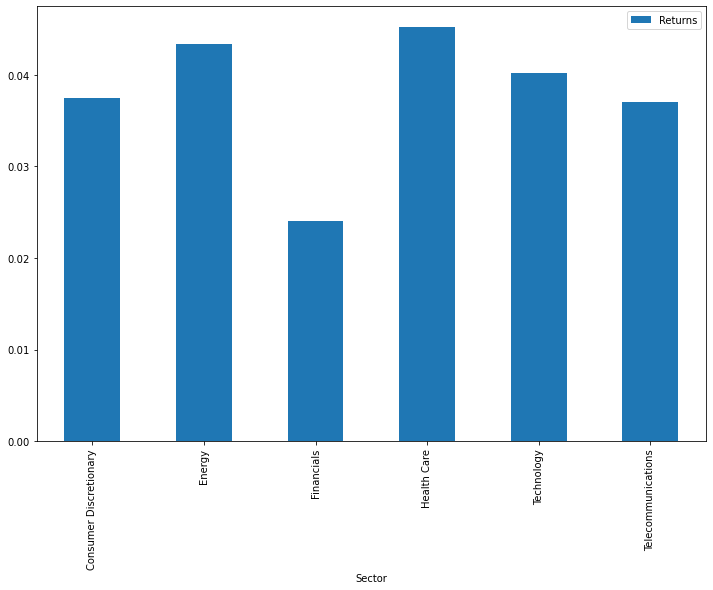

In [112]:

all_sectors.groupby('Sector').Returns.std().to_frame().reset_index().plot(kind = 'bar', x = 'Sector', y = 'Returns',figsize = (12,8))

<AxesSubplot:xlabel='Sector'>

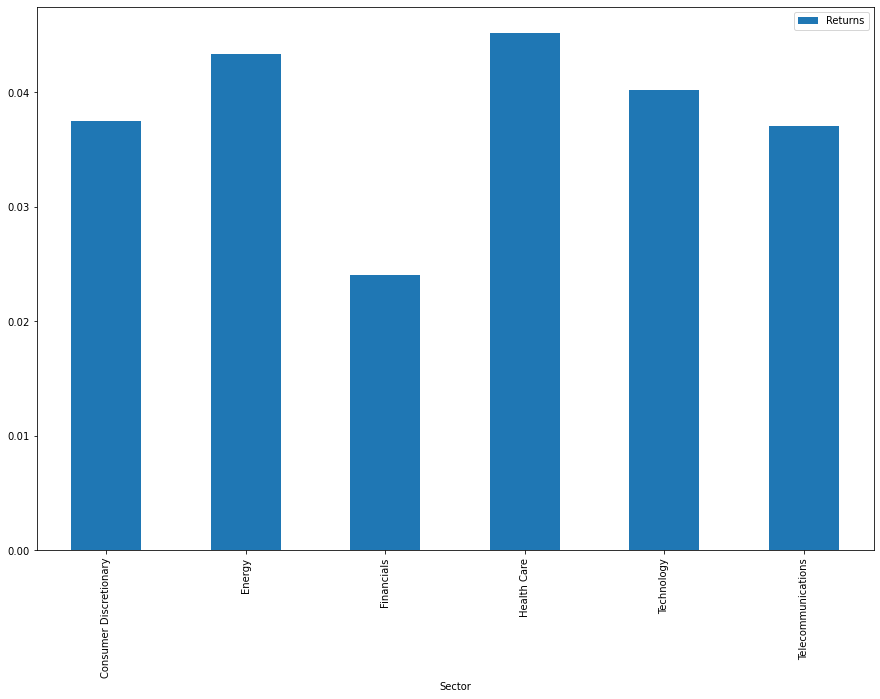

In [109]:

all_sectors.groupby('Sector').Returns.std().to_frame().reset_index().plot(kind = 'bar', x = 'Sector', y = 'Returns',figsize = (15,10))

In [ ]:
amaclose = all_companies[(all_companies['Company']== 'Amazon')& (all_companies['Date'] >=start_date) & (all_companies['Date'] <=end_date)].Close
googclose = all_companies[(all_companies['Company']== 'Google')& (all_companies['Date'] >=start_date) & (all_companies['Date'] <=end_date)].Close
twclose = all_companies[(all_companies['Company']== 'Twitter')& (all_companies['Date'] >=start_date) & (all_companies['Date'] <=end_date)].Close
microclose = all_companies[(all_companies['Company']== 'Microsoft')& (all_companies['Date'] >=start_date) & (all_companies['Date'] <=end_date)].Close
appclose = all_companies[(all_companies['Company']== 'Apple')& (all_companies['Date'] >=start_date) & (all_companies['Date'] <=end_date)].Close
faceclose = all_companies[(all_companies['Company']== 'Facebook')& (all_companies['Date'] >=start_date) & (all_companies['Date'] <=end_date)].Close